<a href="https://colab.research.google.com/github/Anusha770/ANUSHA-T-Level-1/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name Abhay V R
U

In [ ]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Stemming and lemmatization

In [ ]:
words=['run','runner','running','ran','runs','easily','fairly']

In [ ]:
import nltk

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
p_stemmer = PorterStemmer()
s_stemmer = SnowballStemmer(language='english')

In [ ]:
for word in words:
    print(word + '-----' + p_stemmer.stem(word))

run-----run
runner-----runner
running-----run
ran-----ran
runs-----run
easily-----easili
fairly-----fairli


In [ ]:
for word in words:
    print(word + '-----' + s_stemmer.stem(word))

run-----run
runner-----runner
running-----run
ran-----ran
runs-----run
easily-----easili
fairly-----fair


Lemmatization

In [ ]:
import spacy
NLP= spacy.load('en_core_web_sm')

In [ ]:
docl=NLP("The stripped bats are helping on their feet for best")

In [ ]:
for token in docl:
    print(token.text,'\t',token.lemma_)

The 	 the
stripped 	 strip
bats 	 bat
are 	 be
helping 	 help
on 	 on
their 	 their
feet 	 foot
for 	 for
best 	 good


In [ ]:
S1="The stripped bats are helping on their feet for best"
for word in S1.split():
    print(word + '-----' + p_stemmer.stem(word))

The-----the
stripped-----strip
bats-----bat
are-----are
helping-----help
on-----on
their-----their
feet-----feet
for-----for
best-----best


In [ ]:
def bayes_theorem(p_b, p_g_given_b, p_g_given_not_b):
   # calculate P(not B)
   not_b = 1 - p_b
   # calculate P(G)
   p_g = p_g_given_b * p_b + p_g_given_not_b * not_b
   # calculate P(B|G)
   p_b_given_g = (p_g_given_b * p_b) / p_g
   return p_b_given_g
#P(B)
p_b = 1/4
# P(G|B)
p_g_given_b = 1
# P(G|notB)
p_g_given_not_b = 1/3
# calculate P(B|G)
result = bayes_theorem(p_b, p_g_given_b, p_g_given_not_b)
# print result
print('P(B|G) = %.2f%%' % (result * 100))

P(B|G) = 50.00%


In [ ]:
import nltk

In [ ]:
from nltk.corpus import wordnet

In [ ]:
from nltk.corpus import wordnet as wn

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#Min edit distance 
# Declaring the strings 'a' and 'b':
a = "junk"
b = "clunky"

# Declaring array 'D' with rows = len(a) + 1 and columns = len(b) + 1:
D = [[0 for i in range(len(b) + 1)] for j in range(len(a) + 1)]

# Initialising first row:
for i in range(len(a) + 1):
    D[i][0] = i

# Initialising first column:
for j in range(len(b) + 1):
    D[0][j] = j

for i in range(1, len(a) + 1):
    for j in range(1, len(b) + 1):
        if a[i - 1] == b[j - 1]:
            D[i][j] = D[i - 1][j - 1]
        else:
            # Adding 1 to account for the cost of operation
            insertion = 1 + D[i][j - 1]
            deletion = 1 + D[i - 1][j]
            replacement = 1 + D[i - 1][j - 1]

            # Choosing the best option:
            D[i][j] = min(insertion, deletion, replacement)

print("Levenshtein Distance: ", D[len(a)][len(b)])

Levenshtein Distance:  3


In [ ]:
#regex
import re

txt = "The rain in Spain"
x = re.findall("ai", txt)
print(x)
y = re.search("\s", txt)
print("The first white-space character is located in position:", y.start())
txt = "The rain in Spain"
z = re.sub("\s", "9", txt)
print(z)

['ai', 'ai']
The first white-space character is located in position: 3
The9rain9in9Spain


In [ ]:
#penn treebank tokenation
from nltk.tokenize import TreebankWordTokenizer
s = '''Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\nThanks.'''
TreebankWordTokenizer().tokenize(s)
TreebankWordTokenizer().tokenize(s, convert_parentheses=True)
TreebankWordTokenizer().tokenize(s, return_str=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Parameter 'return_str' has been deprecated and should no longer be used.
  """


['Good',
 'muffins',
 'cost',
 '$',
 '3.88',
 'in',
 'New',
 'York.',
 'Please',
 'buy',
 'me',
 'two',
 'of',
 'them.',
 'Thanks',
 '.']

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 

from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

In [ ]:
VOCAB_SIZE = 30000
EMBEDDING_DIM = 16
EPOCHS = 15
MAX_LEN = 32
TRUNC_TYPE = 'post'
PADD_TYPE = 'post'
UNK_TOK = '<UNK>'
TRAINING_SIZE = 1000

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Spam dataset.csv to Spam dataset.csv


In [ ]:
dataset = pd.read_csv('Spam dataset.csv')

In [ ]:
dataset["Category"] = [1 if each == "spam" else 0 for each in dataset["Category"]]

In [ ]:
X = dataset.iloc[:, 1].values
X = X.reshape(-1, 1)

In [ ]:
Y = dataset.iloc[:, 0].values
y = Y.reshape(-1, 1)

In [ ]:
X = list(X)
y = list(y)

In [ ]:
Training_Sentences = X[TRAINING_SIZE:]
Training_Labels = y[TRAINING_SIZE:]

In [ ]:
Testing_Sentences = X[0: TRAINING_SIZE]
Testing_Lables = y[0:TRAINING_SIZE]

In [ ]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=UNK_TOK)
tokenizer.fit_on_texts(Training_Sentences)

word_index = tokenizer.word_index

#print(word_index, '\n \n \n')

Training_Sequences = tokenizer.texts_to_sequences(Training_Sentences)
Training_pad = pad_sequences(Training_Sequences, maxlen=MAX_LEN, padding=PADD_TYPE, truncating=TRUNC_TYPE)

Testing_Sequences = tokenizer.texts_to_sequences(Testing_Sentences)
Testing_pad = pad_sequences(Testing_Sequences, maxlen=MAX_LEN, padding=PADD_TYPE, truncating=TRUNC_TYPE)

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
Training_Sequences_padded = np.asarray(Training_pad)
Testing_Sequences_padded = np.asarray(Testing_pad)
Training_Labels = np.asarray(Training_Labels)
Testing_Lables = np.asarray(Testing_Lables)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(Training_Sequences_padded, Training_Labels, validation_data=(Testing_Sequences_padded, Testing_Lables), epochs=EPOCHS)

Epoch 1/15
143/143 [==============================] - 21s 91ms/step - loss: 0.4126 - accuracy: 0.8637 - val_loss: 0.4270 - val_accuracy: 0.8480
Epoch 2/15
143/143 [==============================] - 11s 80ms/step - loss: 0.3880 - accuracy: 0.8699 - val_loss: 0.4313 - val_accuracy: 0.8480
Epoch 3/15
143/143 [==============================] - 12s 85ms/step - loss: 0.1887 - accuracy: 0.9381 - val_loss: 0.9332 - val_accuracy: 0.2300
Epoch 4/15
143/143 [==============================] - 11s 80ms/step - loss: 0.0049 - accuracy: 0.9996 - val_loss: 4.0931 - val_accuracy: 0.2300
Epoch 5/15
143/143 [==============================] - 11s 79ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 3.7445 - val_accuracy: 0.2300
Epoch 6/15
143/143 [==============================] - 11s 79ms/step - loss: 3.2416e-04 - accuracy: 1.0000 - val_loss: 4.7166 - val_accuracy: 0.2300
Epoch 7/15
143/143 [==============================] - 11s 79ms/step - loss: 1.6521e-04 - accuracy: 1.0000 - val_loss: 5.2502 - val_a

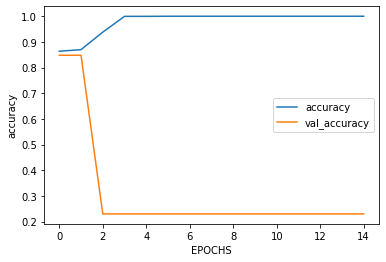

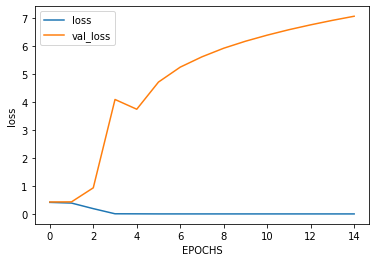

In [ ]:
def Plot(history, string):
 plt.plot(history.history[string])
 plt.plot(history.history['val_' + string])
 plt.xlabel('EPOCHS')
 plt.ylabel(string)
 plt.legend([string, 'val_' + string])
 plt.show()

Plot(history, "accuracy")
Plot(history, "loss")

In [ ]:
text = 'Dear Abhay how do you do?'
Test = tokenizer.texts_to_sequences([text])[0]
Test_padded = pad_sequences([Test], maxlen=MAX_LEN, padding=PADD_TYPE, truncating=TRUNC_TYPE)
Test_padded = np.asarray(Test_padded)

In [ ]:
ypred = model.predict(Test_padded)

print('output class: ', ypred)

output class:  [[0.99994147]]
